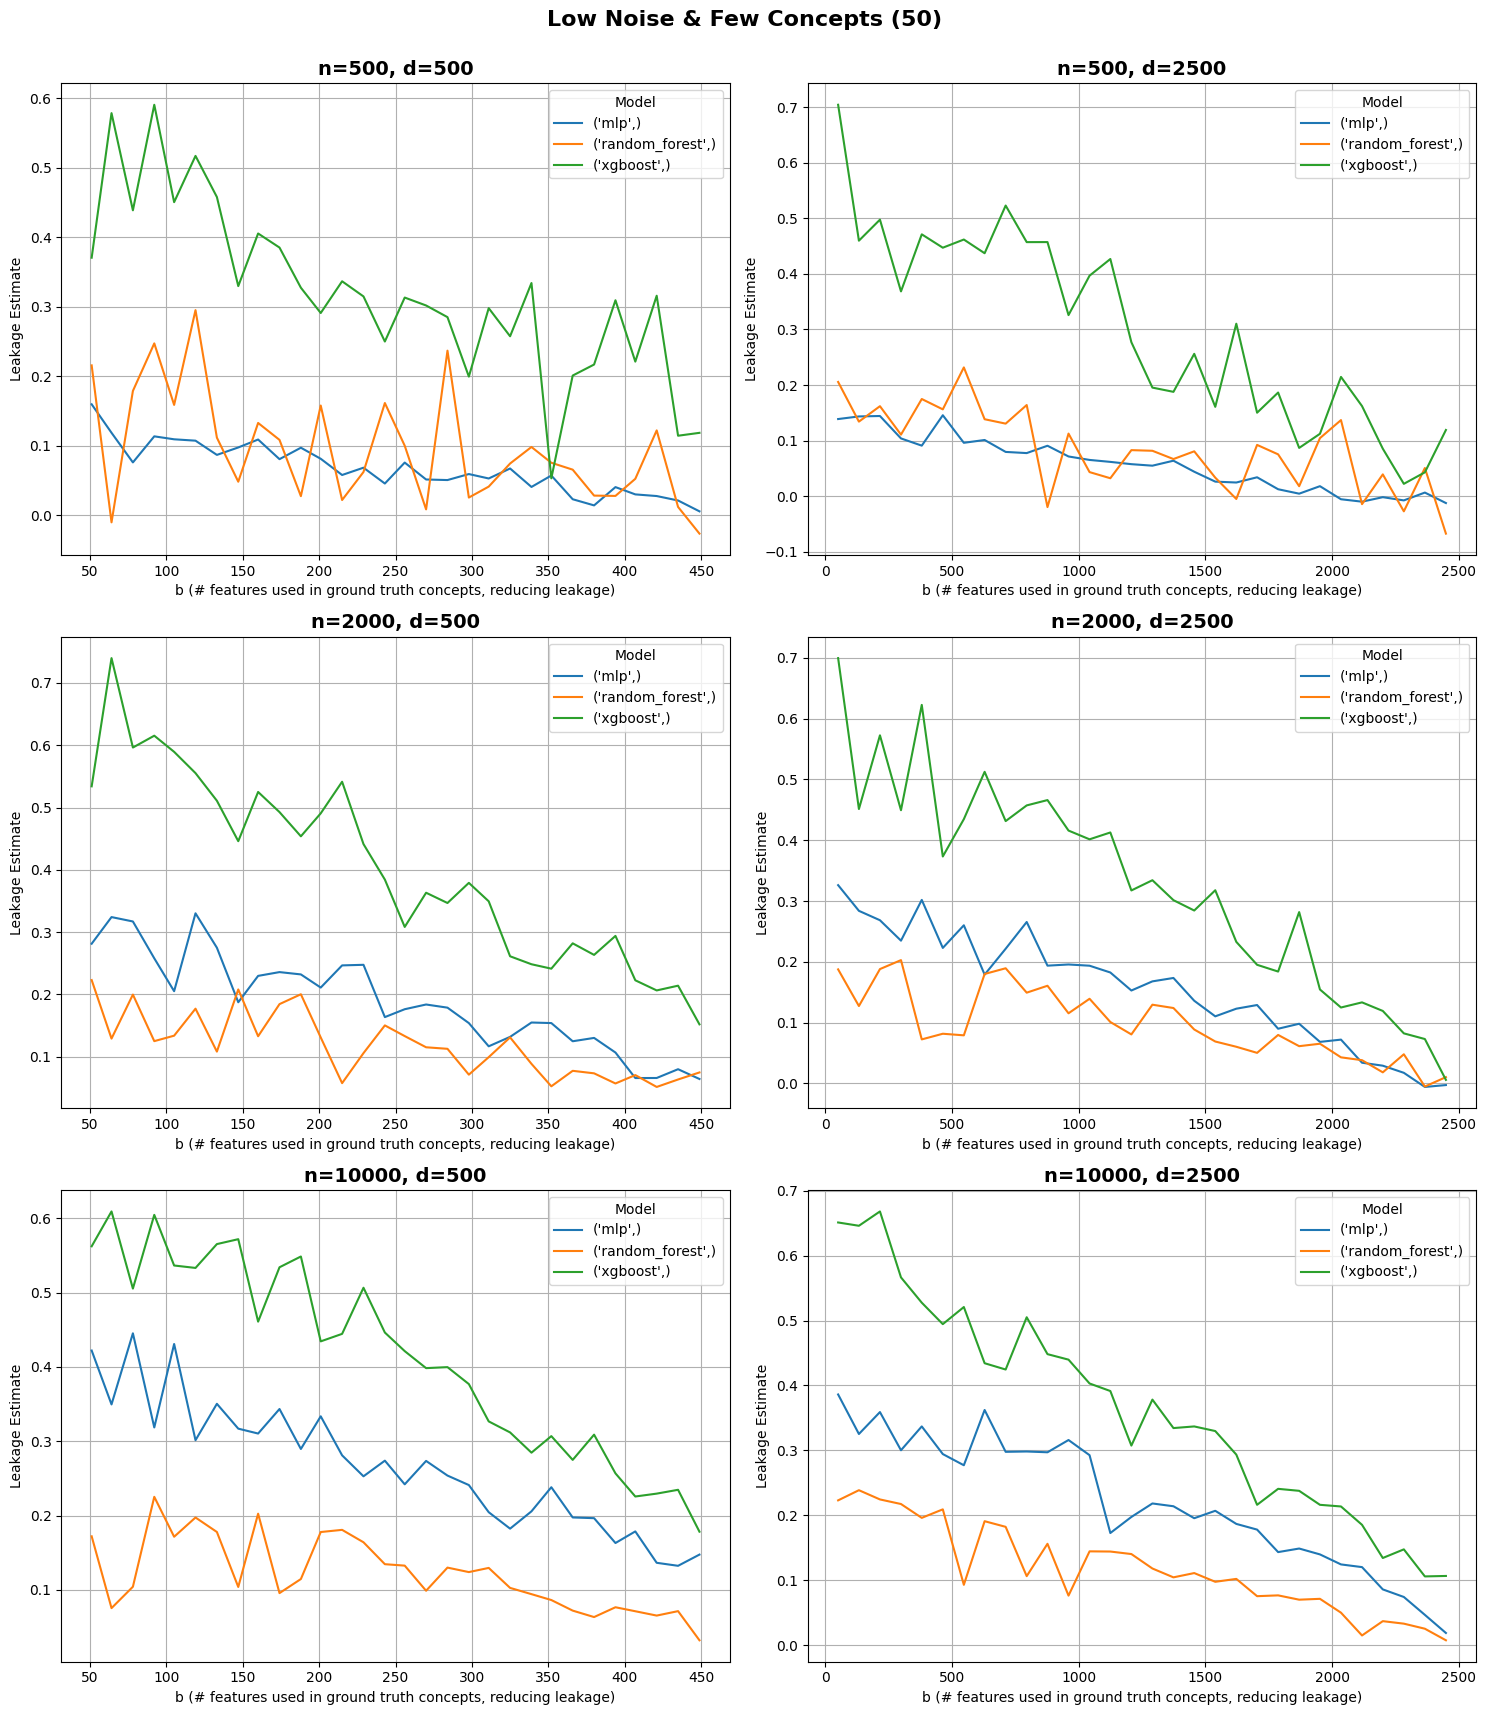

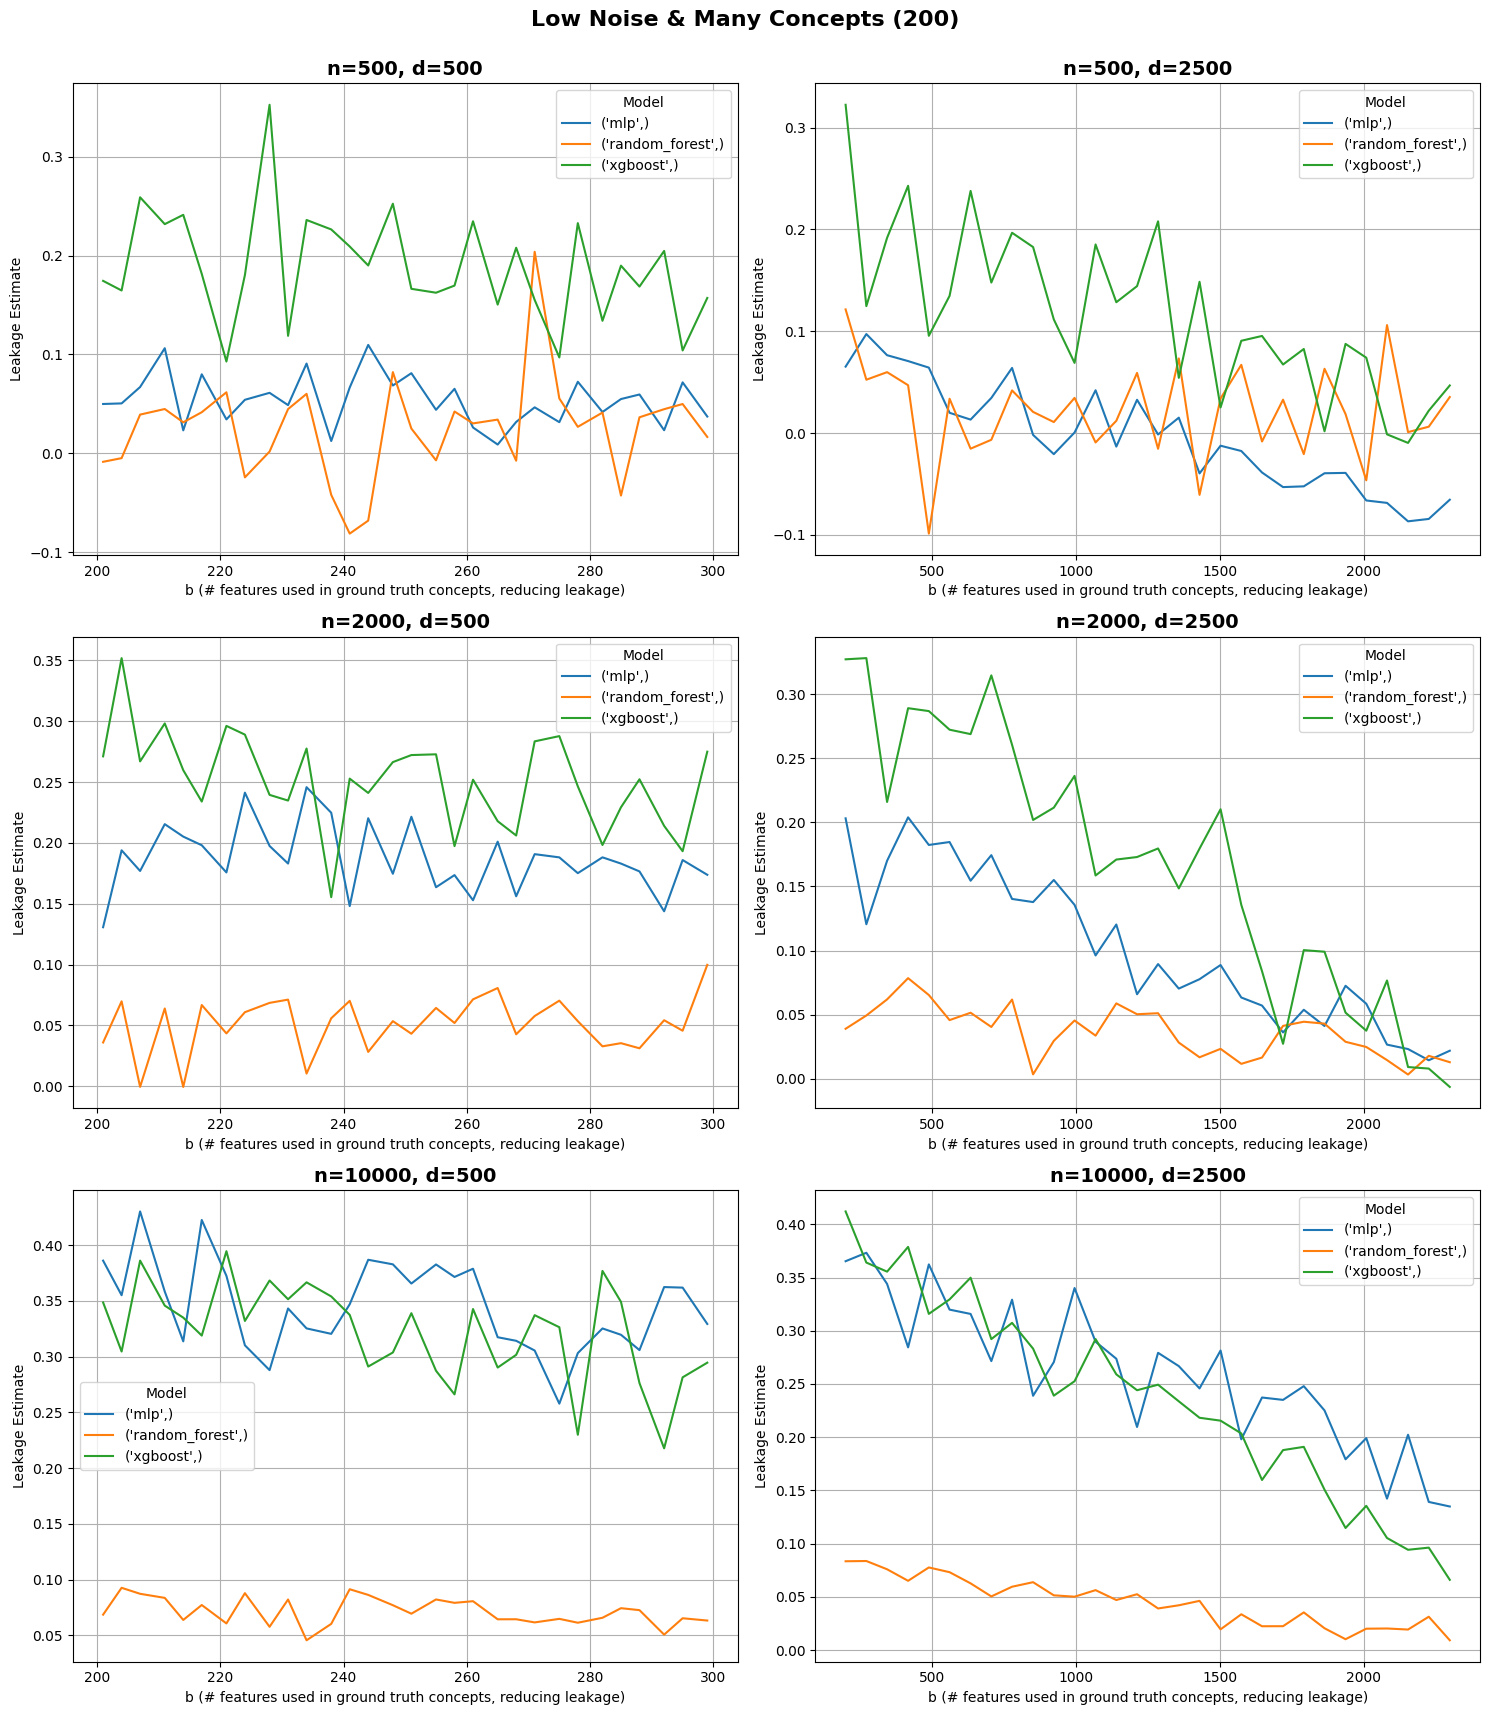

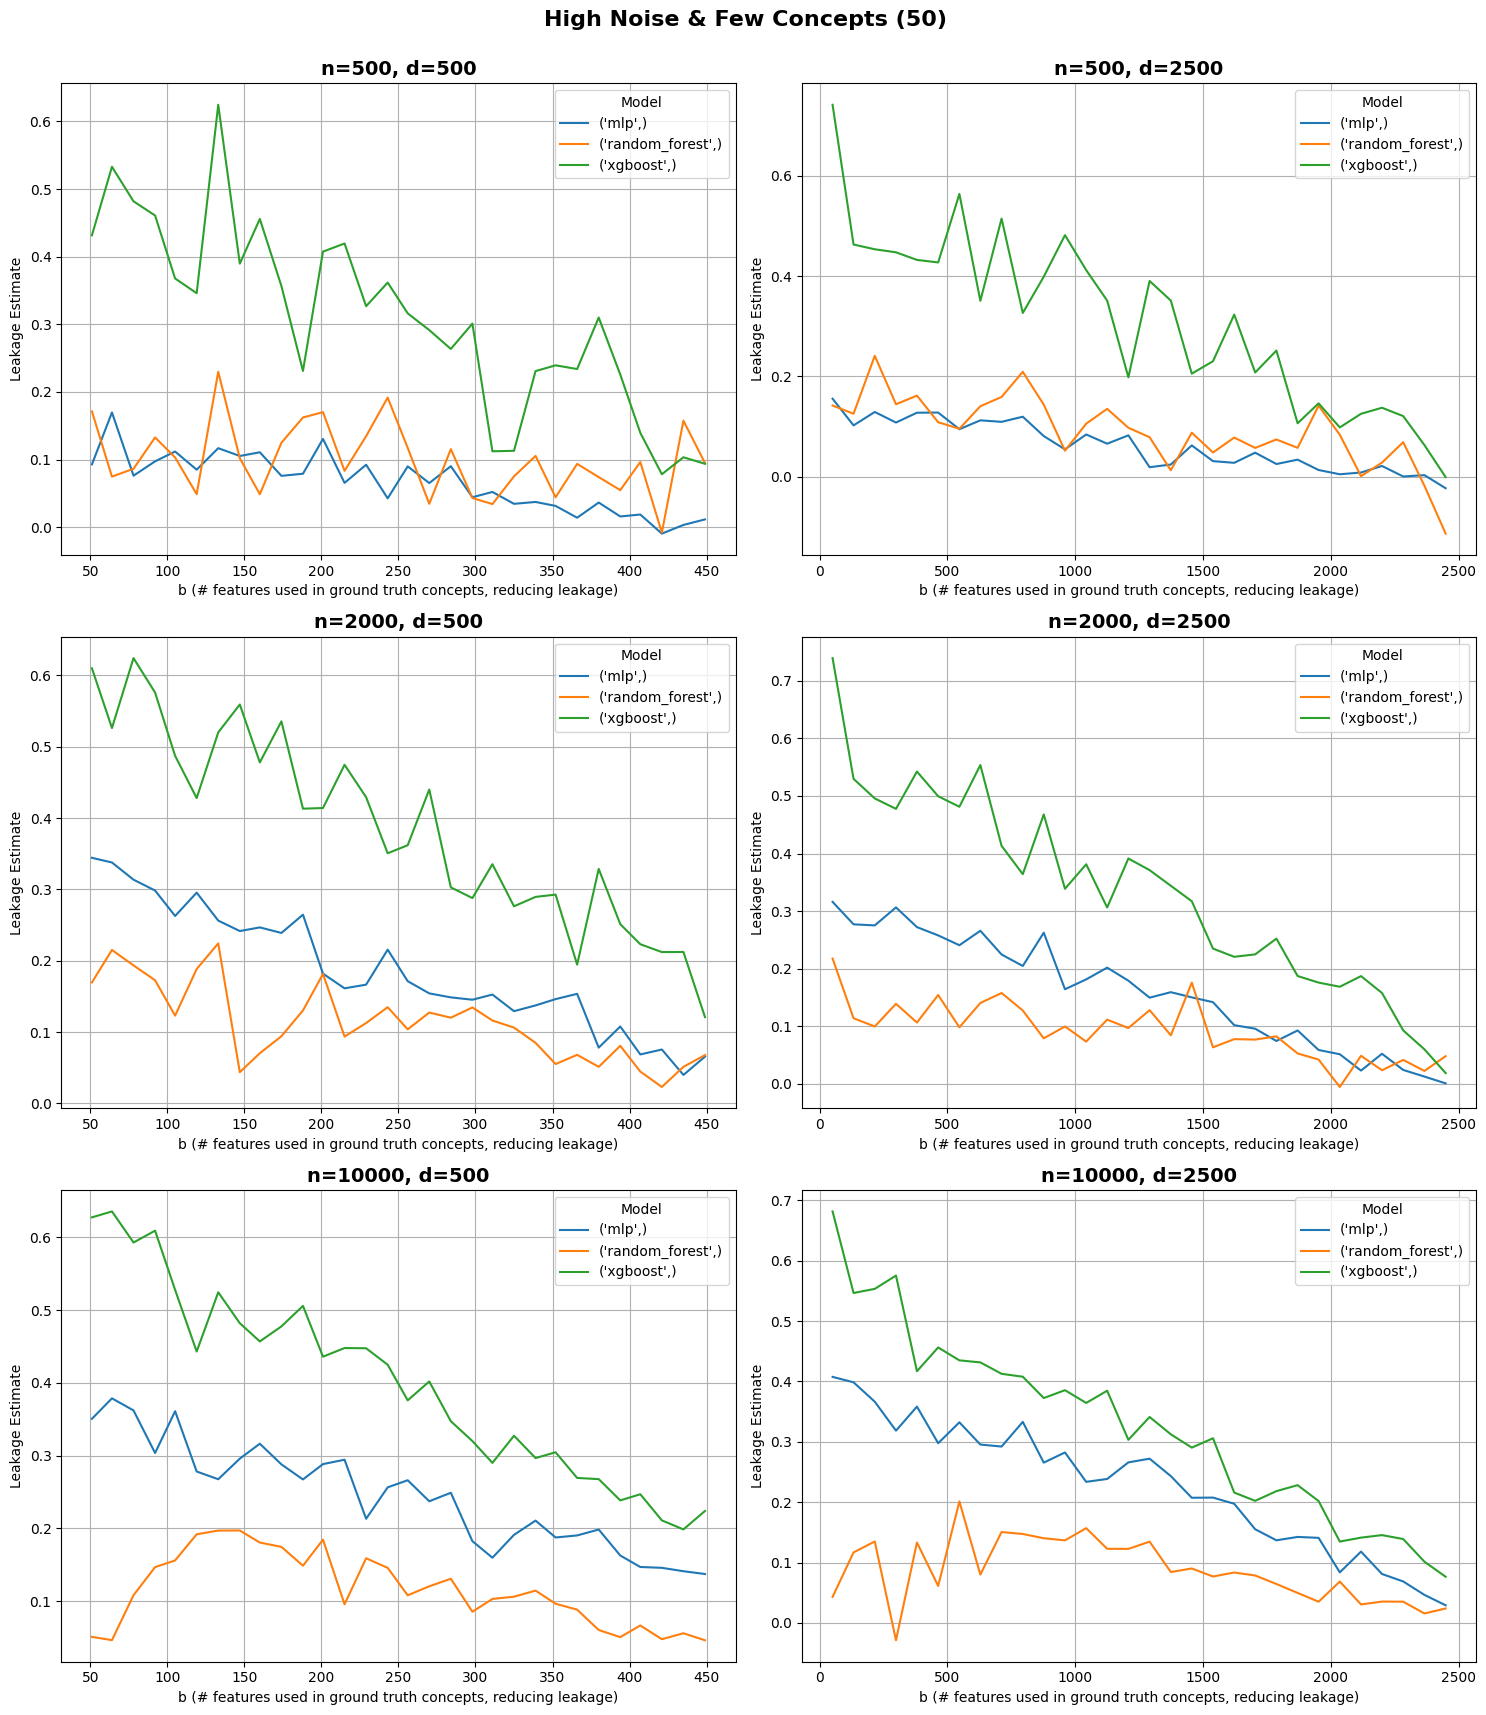

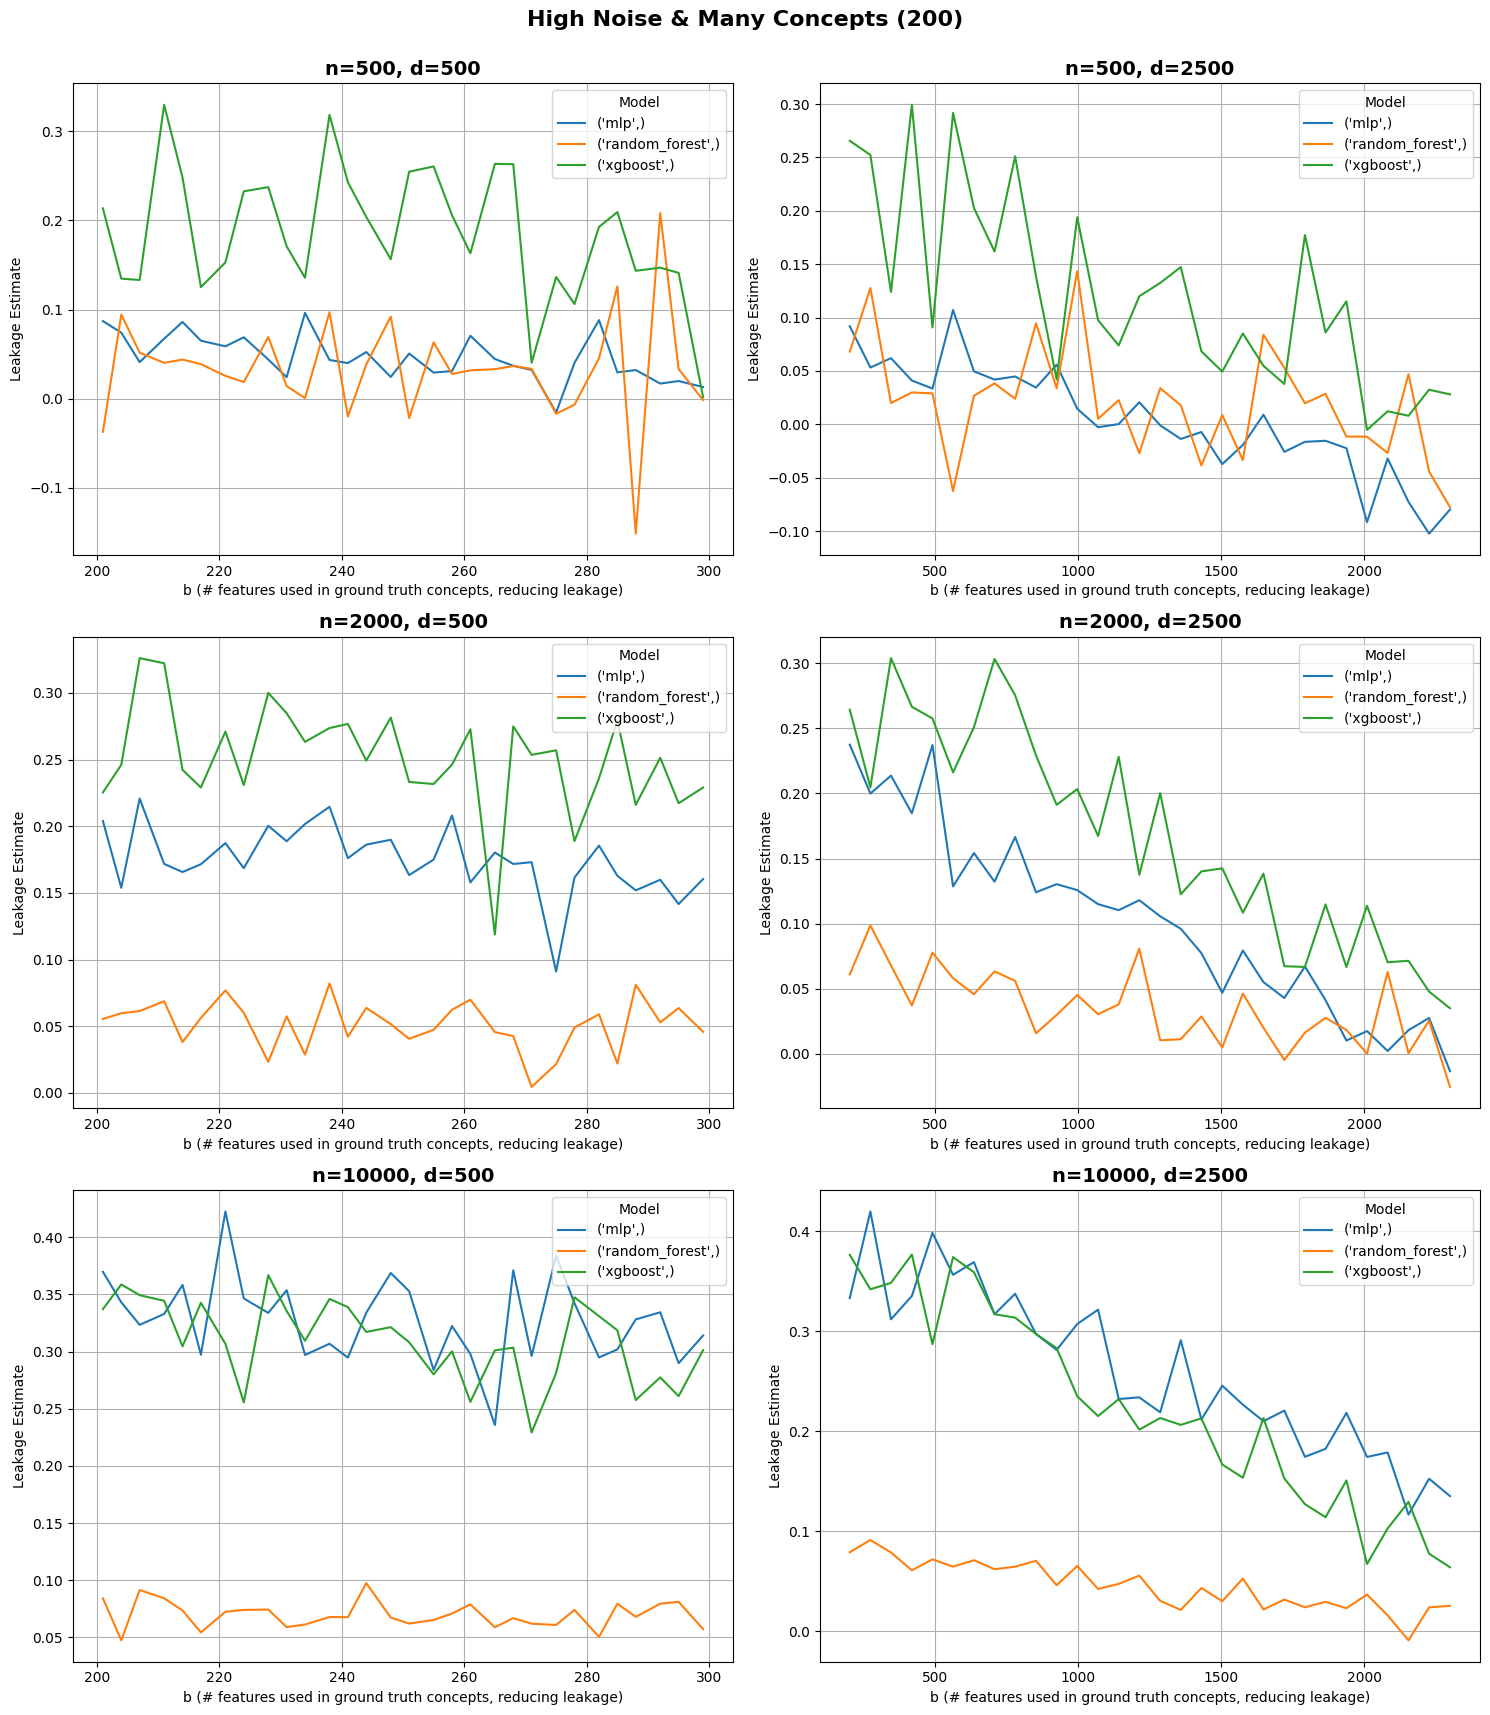

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_leakage_estimate_by_noise_and_k(data_path, noise_threshold):
    """
    Plots leakage estimates for different levels of noise and different leakage levels (b).

    Parameters:
        data_path (str): Path to the CSV file containing the data.
        noise_threshold (float): Threshold to split the data into low and high noise groups.
    """
    # Load the data from the specified CSV file
    df = pd.read_csv(data_path)

    # Identify unique k values and map them to descriptive labels for the legend
    unique_k = sorted(df['k'].unique())
    if len(unique_k) != 2:
        raise ValueError("Expected exactly two unique values for 'k'.")
    
    k_labels = {
        unique_k[0]: 'Few Concepts (50)',
        unique_k[1]: 'Many Concepts (200)'
    }

    def create_subplots(data_subset, title_prefix):
        """
        Creates subplots for a specific subset of the data, grouped by n and d values.

        Parameters:
            data_subset (DataFrame): Subset of the data to plot.
            title_prefix (str): Title describing the data subset.
        """
        # Find unique combinations of n and d
        unique_combinations = data_subset[['n', 'd']].drop_duplicates()
        num_plots = len(unique_combinations)

        # Determine the layout: 2 plots per row
        num_cols = 2
        num_rows = math.ceil(num_plots / num_cols)

        # Create the figure and subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows), squeeze=False)
        axs = axs.flatten()  # Flatten the array for easier iteration

        # Set a title for the entire group of plots
        fig.suptitle(f"{title_prefix}", fontsize=16, fontweight="bold", y=0.95)

        # Iterate through each unique combination of n and d
        for i, (_, combo) in enumerate(unique_combinations.iterrows()):
            n, d = combo['n'], combo['d']

            # Filter the data for this specific combination
            subset = data_subset[(data_subset['n'] == n) & (data_subset['d'] == d)]

            # Plot leakage estimates grouped by model type
            for model_type, group in subset.groupby(['model_type']):
                axs[i].plot(
                    group['b'],
                    group['leakage_estimate'],
                    label=f"{model_type}"  # Only include model type in the legend
                )

            # Set subplot-specific details
            axs[i].set_title(f"n={n}, d={d}", fontweight="bold", fontsize=14)
            axs[i].set_xlabel("b (# features used in ground truth concepts, reducing leakage)")
            axs[i].set_ylabel("Leakage Estimate")
            axs[i].legend(title="Model", title_fontsize="medium")
            axs[i].grid(True)

        # Turn off any unused subplot axes
        for j in range(i + 1, len(axs)):
            axs[j].axis('off')

        # Adjust layout to reduce overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    # Split the data into low and high noise groups based on the threshold
    low_noise_df = df[df['noise_level'] <= noise_threshold]
    high_noise_df = df[df['noise_level'] > noise_threshold]

    # Further split each noise group into subsets based on k
    subsets = {
        'Low Noise & Few Concepts (50)': low_noise_df[low_noise_df['k'] == unique_k[0]],
        'Low Noise & Many Concepts (200)': low_noise_df[low_noise_df['k'] == unique_k[1]],
        'High Noise & Few Concepts (50)': high_noise_df[high_noise_df['k'] == unique_k[0]],
        'High Noise & Many Concepts (200)': high_noise_df[high_noise_df['k'] == unique_k[1]]
    }

    # Generate plots for each subset
    for title_prefix, subset in subsets.items():
        if subset.empty:
            print(f"No data available for subset: {title_prefix}")
            continue
        create_subplots(subset, title_prefix)

# File path to the dataset and noise threshold
data_path = 'simulation_results/res_leak_measure_val/res_leak_measure_val_20250101_132955.csv'
noise_threshold = 0.5  # Define the noise threshold

# Generate the plots
plot_leakage_estimate_by_noise_and_k(data_path, noise_threshold)